# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Case Study

This project analyses transactional data from an online retail store to understand sales trends, customer purchasing behaviour, and product performance. The analysis focuses on identifying patterns, anomalies, and revenue drivers within historical transaction records.

Exploratory data analysis techniques were applied to uncover seasonal demand patterns, high-performing products, and high-value customers. The insights derived from this analysis are intended to support data-driven decision-making related to inventory planning, customer engagement, and market priorit

## Project Objectives

The objectives of this analysis were to:
1. Examine and understand the structure and quality of online retail transaction data
2. Identify key sales trends, customer behaviour patterns, and product performance drivers
3. Generate actionable, data-driven insights to support operational and strategic retail decisions

## Dataset

The analysis uses the publicly available *Online Retail* dataset, which contains transactional data from a UK-based online retail store covering the period from 2010 to 2011. The dataset is provided as an Excel file (`Online Retail.xlsx`) and includes detailed records of individual product-level transactions.

The dataset contains the following variables:

- InvoiceNo: Invoice number associated with each transaction  
- StockCode: Unique product identifier  
- Description: Product description  
- Quantity: Number of units purchased  
- InvoiceDate: Date and time of the transaction  
- UnitPrice: Price per unit  
- CustomerID: Unique customer identifier  
- Country: Country where the transaction occurred  

## Data Loading and Initial Inspection

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Initial Observations

The dataset consists of transaction-level records, with each row representing a product purchased within an invoice. Missing values were observed in the CustomerID and Description fields, indicating incomplete customer and product information for certain transactions. Summary statistics revealed the presence of invalid values, such as non-positive quantities and unit prices, as well as highly skewed numerical distributions. These issues indicated the need for data cleaning and validation prior to deeper analysis.

## Data Cleaning and Preparation

In [13]:
df = df.dropna(subset=["CustomerID"])

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df = df.dropna(subset=["Description"])

In [16]:
df = df[df["Quantity"] > 0]

In [17]:
df = df[df["UnitPrice"] > 0]

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(392692, 8)

In [21]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Data Cleaning Summary

The dataset was cleaned by removing records with missing customer identifiers and product descriptions, excluding transactions with non-positive quantities and unit prices, and eliminating duplicate records. These steps ensure that the data reflects valid retail transactions and is suitable for reliable exploratory analysis and business insight generation.

In [23]:
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

In [24]:
df[["Quantity", "UnitPrice", "TotalSales"]].head()

,Quantity,UnitPrice,TotalSales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [25]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalSales   392692 non-null  float64       
 9   Year         392692 non-null  int32         
 10  Month        392692 non-null  int32         
 11  Day          392692 non-null  int32         
 12  Hour         392692 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(4)
memory usage: 36.0+ MB


## Feature Engineering

Additional features were created to support exploratory analysis. A transaction-level revenue variable (TotalSales) was calculated using quantity and unit price. Time-based features including year, month, day, and hour were extracted from the invoice timestamp to enable temporal trend analysis of sales activity.

In [27]:
total_revenue = df["TotalSales"].sum()
total_revenue

8887208.894

### Overall Sales Performance

The dataset represents total revenue generated from valid retail transactions during the analysis period. This figure provides a baseline understanding of the store’s overall sales performance and serves as a reference point for subsequent trend and segmentation analyses.

In [28]:
monthly_sales = df.groupby("Month")["TotalSales"].sum()
monthly_sales

Month
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677355.150
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1156205.610
12    1087613.170
Name: TotalSales, dtype: float64

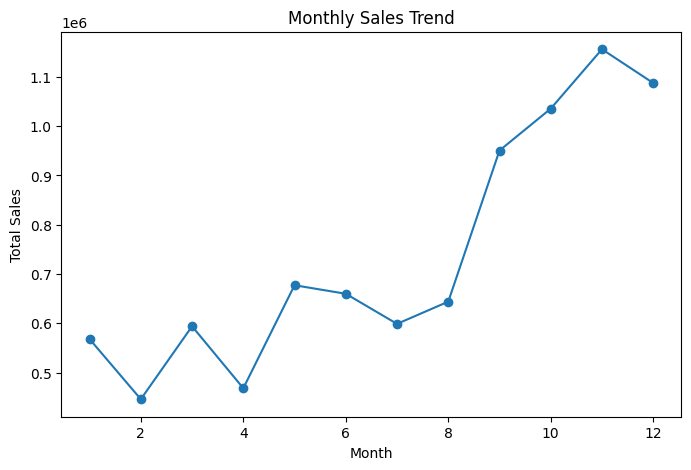

In [29]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

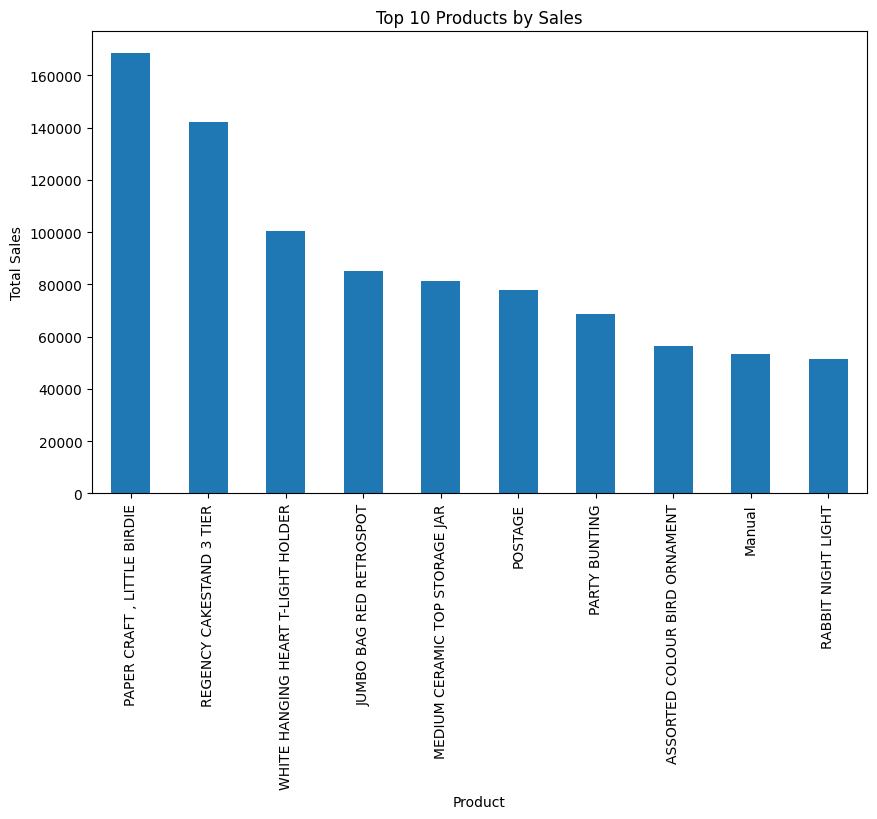

In [30]:
top_products = (
    df.groupby("Description")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

In [31]:
top_customers = (
    df.groupby("CustomerID")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalSales, dtype: float64

Text(0.5, 1.0, 'Top 10 Countries by Sales')

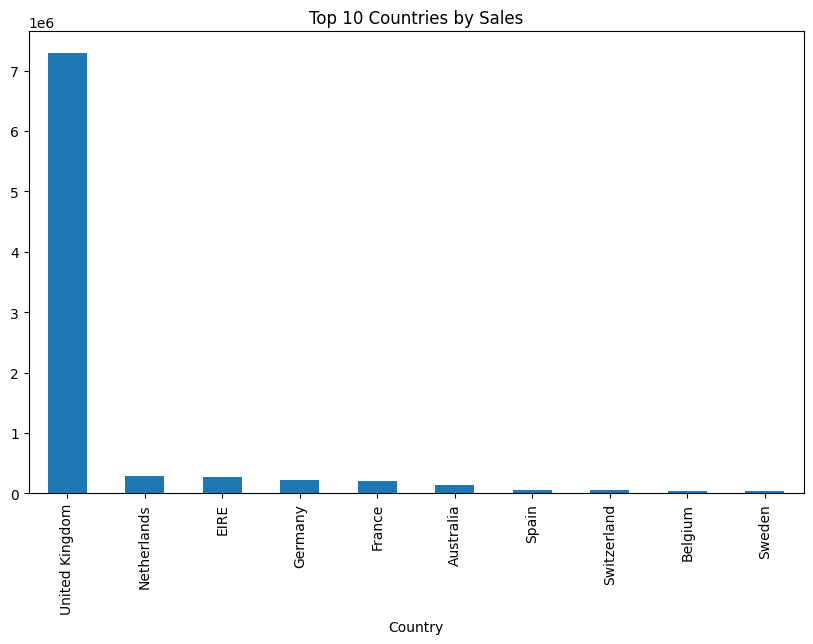

In [32]:
country_sales = (
    df.groupby("Country")["TotalSales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_sales
country_sales.plot(kind="bar", figsize=(10,6))
plt.title("Top 10 Countries by Sales")

## Exploratory Data Analysis Summary

Exploratory analysis revealed clear revenue concentration across specific products, customers, and geographic regions. Monthly sales trends indicate seasonal variation in purchasing activity, while a relatively small subset of products and customers contributes disproportionately to overall revenue. These findings suggest opportunities for targeted inventory management, customer retention strategies, and region-specific marketing initiatives.

## Business Recommendations

Based on the findings from the exploratory analysis, several recommendations emerge. Inventory planning should prioritise consistently high-performing products, particularly during peak seasonal periods identified in the sales trends. Customer engagement strategies such as targeted promotions or loyalty initiatives could focus on high-value customers who contribute disproportionately to overall revenue. Additionally, while the United Kingdom represents the dominant market, secondary markets such as the Netherlands, Germany, and France present opportunities for targeted growth through region-specific marketing and distribution strategies.

## Project Summary

This project presents an end-to-end exploratory data analysis of online retail transactions, covering data cleaning, feature engineering, and insight generation. The analysis identified strong seasonal sales patterns, significant revenue concentration among a small group of products and customers, and a dominant contribution from the UK market. These insights demonstrate how transactional data can be leveraged to inform inventory management, customer strategy, and market expansion decisions.